In [1]:
#Load and Visualize Dataset
import pandas as pd
df = pd.read_csv("/content/Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
# Drop CustomerID and handle Gender if needed
df.drop('CustomerID', axis=1, inplace=True)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Feature matrix
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [3]:
#Dimensionality Reduction (PCA for 2D Visualization)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [4]:
#Fit K-Means and Assign Cluster Labels
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = labels

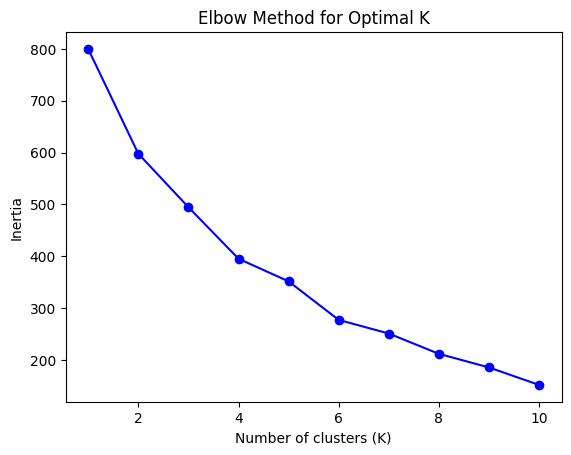

In [5]:
#Elbow Method to Find Optimal K
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot Elbow
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


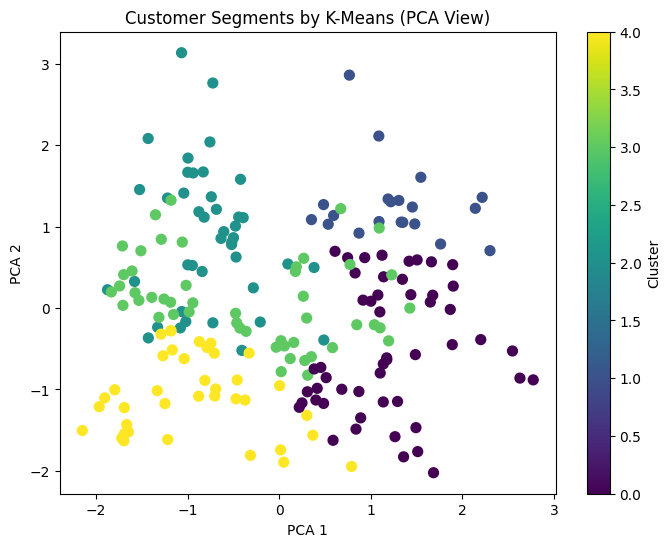

In [6]:
#Visualize Clusters (with PCA)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Customer Segments by K-Means (PCA View)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [8]:
for k in [3, 4, 6, 7]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")


K=3, Silhouette Score=0.258
K=4, Silhouette Score=0.290
K=6, Silhouette Score=0.335
K=7, Silhouette Score=0.346


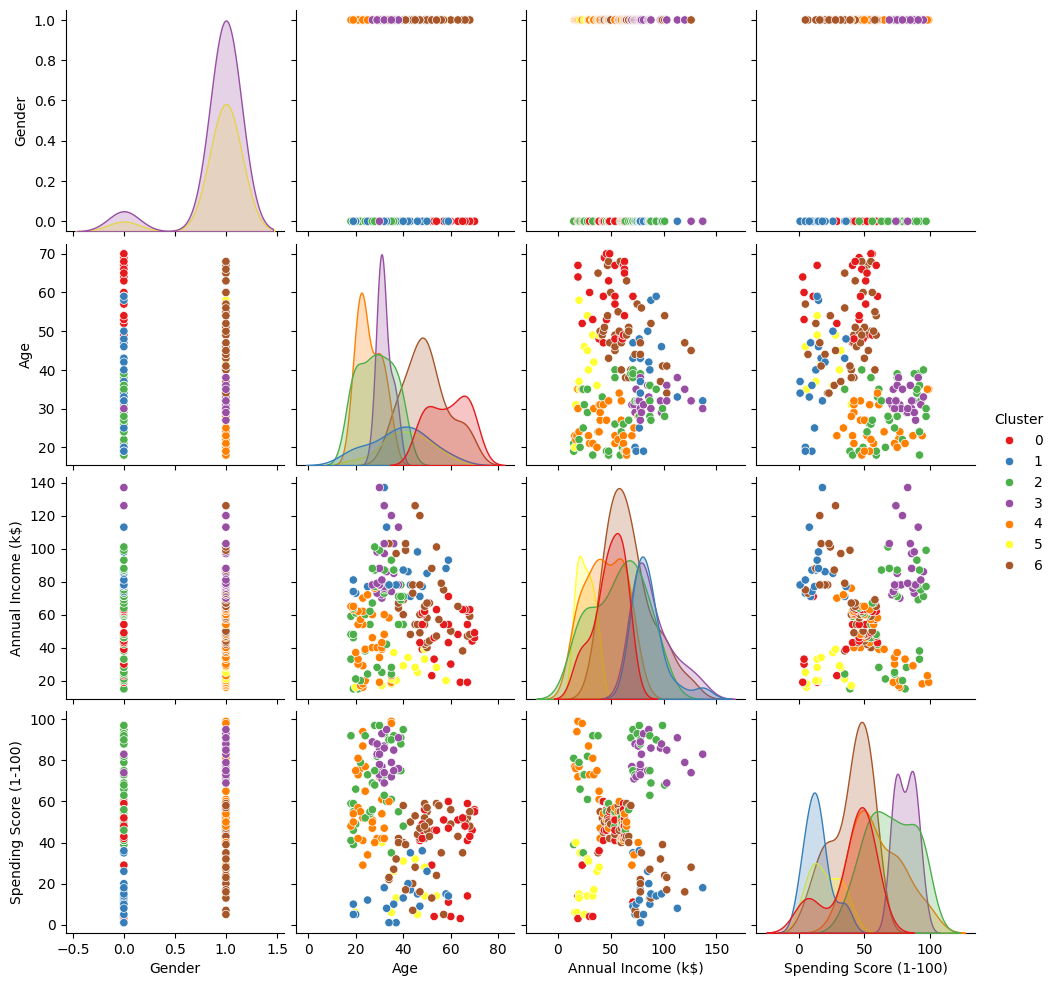

In [9]:
import seaborn as sns
df['Cluster'] = labels
sns.pairplot(df, hue='Cluster', palette='Set1')